# Statistical Analysis and Visualization with Python Assignment

## Project Overview
This project aims to generate a synthetic dataset and use it to perform various statistical analyses including highlighting the findings, visualizations, and interpretations. 
The tools and libraries used in the project are:
* Pandas 
* Numpy 
* Matplotlib 
* Seaborn
   

## Task 1: Data Generation
### 1. Generate a synthetic dataset:
* Use Numpy to create a dataset with 1000 samples.
* The dataset should include the following columns: Age, Height, Weight, Gender, and Income.
    - Age: Normally distributed with a mean of 35 and a standard deviation of 10.
    - Height: Normally distributed with a mean of 170 cm and a standard deviation of 15 cm.
    - Weight: Normally distributed with a mean of 70 kg and a standard deviation of 10 kg.
    - Gender: Randomly assigned with 50% probability for 'Male' and 'Female'.
    - Income: Normally distributed with a mean of 50,000 and a standard deviation of 15,000.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples
n_samples = 1000

# Generate normally distributed values for Age
age_mean = 35
age_std = 10
age = np.random.normal(age_mean, age_std, n_samples).astype(int)

# Generate normally distributed values for Height
height_mean = 170
height_std = 15
height = np.random.normal(height_mean, height_std, n_samples).astype(int)

# Generate normally distributed values for Weight
weight_mean = 70
weight_std = 10
weight = np.random.normal(weight_mean, weight_std, n_samples).astype(int)

# Generate values for Gender: randomly assign "Male" or "Female" 
# with equal probability
gender = np.random.choice(['Male', 'Female'], size=n_samples, p=[0.5, 0.5])

# Generate normally distributed values for Income
income_mean = 50000
income_std = 15000
income = np.random.normal(income_mean, income_std, n_samples).astype(int)

# Create a dictionary to store the data with each key representing a feature
data = {
    'Age': age,
    'Height': height,
    'Weight': weight,
    'Gender': gender,
    'Income': income
}

# Create a DataFrame with the data
df = pd.DataFrame(data)

# Print the first 5 rows of data frame
print(df.head(5))

   Age  Height  Weight  Gender  Income
0   52     178      54  Female   32268
1   39     183      52  Female   39257
2   44     163      70  Female   25376
3   57     171      60    Male   36649
4   53     173      69    Male   60412


In [8]:
# Printing basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     1000 non-null   int32 
 1   Height  1000 non-null   int32 
 2   Weight  1000 non-null   int32 
 3   Gender  1000 non-null   object
 4   Income  1000 non-null   int32 
dtypes: int32(4), object(1)
memory usage: 23.6+ KB
None


## Task 2: Descriptive Statistics

### 2. Calculate basic descriptive statistics:
* Calculate mean, median, standard deviation, and variance for Age, Height, Weight, and Income.

In [3]:
# Calculate basic descriptive statistics
print(df.describe())

               Age       Height       Weight        Income
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     34.037000   169.717000    68.997000  50109.549000
std       9.870717    14.533552     9.552185  15029.186562
min       4.000000   125.000000    38.000000   4888.000000
25%      27.750000   160.000000    62.000000  39432.500000
50%      34.000000   170.000000    69.000000  49979.500000
75%      41.000000   179.000000    76.000000  60455.000000
max      62.000000   217.000000    99.000000  93878.000000


### 3. Calculate the mode for Gender.

In [21]:
# Calculate the mode for Gender
print(df['Gender'].mode())

0    Male
dtype: object


## Task 3: Data Visualization

### 4. **Visualize the distributions:**
* Plot histograms for Age, Height, Weight, and Income.
* Use Seaborn to create KDE plots for Age, Height, Weight, and Income.

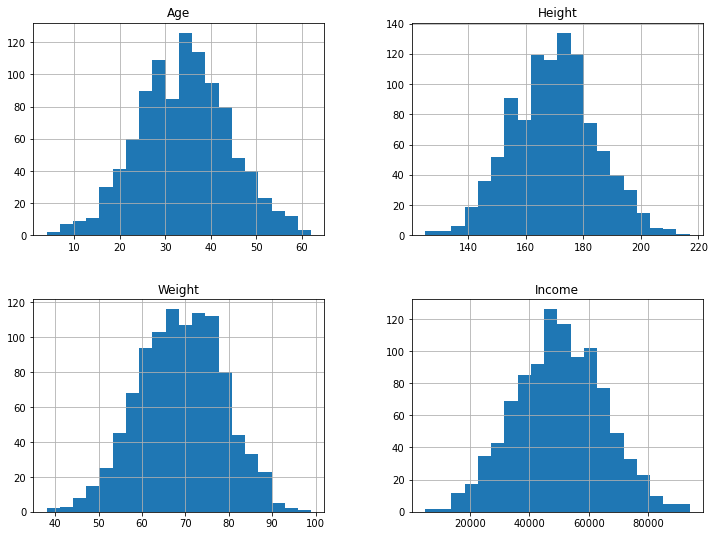

In [2]:
# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Histograms for all numerical columns of data frame 
# (Age, Height, Weight, and Income)
df.hist(bins = 20, figsize=(12,9))
plt.show()

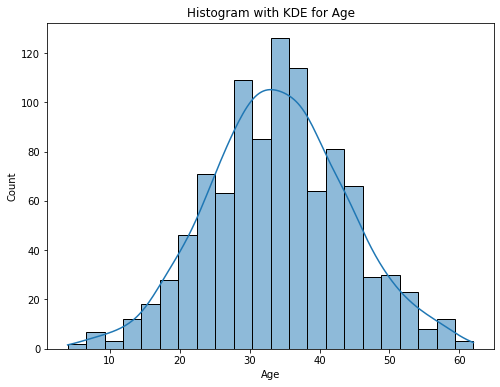

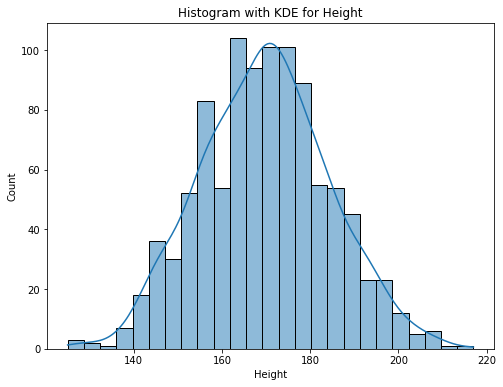

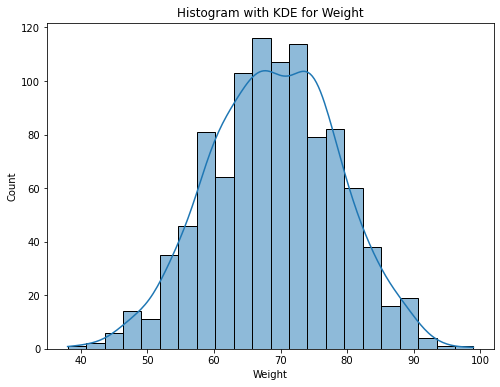

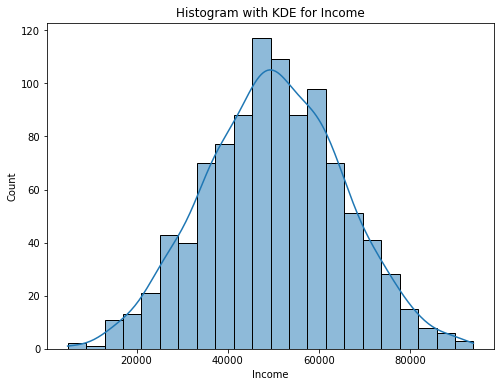

In [17]:
# Use Seaborn to create KDE plots for Age, Height, Weight, and Income.

# Creating histograms with KDE (Kernel Density Estimate) plots 
# for each numerical column of data frame (Age, Height, Weight, and Income)
for column in df.select_dtypes(include=['int32']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram with KDE for {column}')
    plt.show()

### 5. Boxplots to identify outliers:

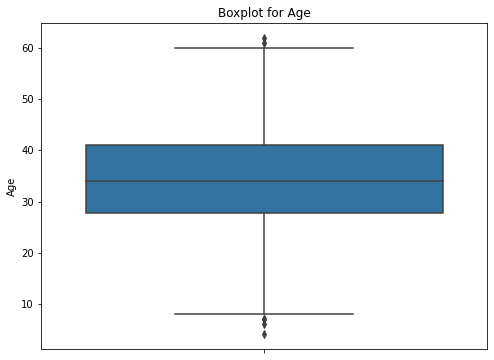

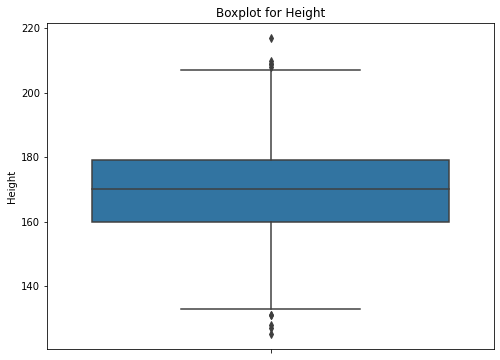

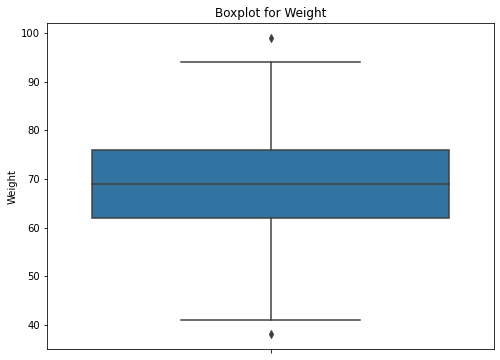

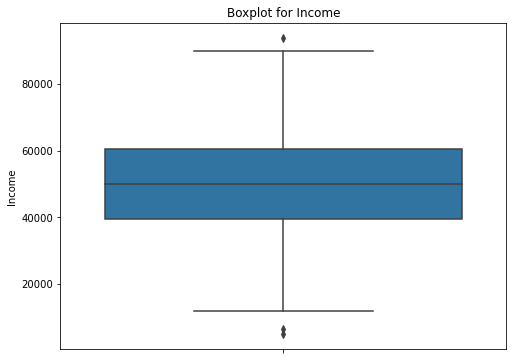

In [4]:
# Creating boxplots for each numerical column 
for column in df.select_dtypes(include=['int32']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

## Task 4: Correlation Analysis

### 6. Calculate correlation:
* Calculate the Pearson correlation coefficient between Age, Height, Weight, and Income.

In [5]:
# For this purpose has been used .corr() method of dataframe 
# with default setting which method='pearson'

correlation_matrix = df[['Age', 'Height', 'Weight', 'Income']].corr()
correlation_matrix

,Age,Height,Weight,Income
Age,1.000000,-0.032534,-0.037210,0.031417
Height,-0.032534,1.000000,-0.000850,0.020278
Weight,-0.037210,-0.000850,1.000000,-0.023973
Income,0.031417,0.020278,-0.023973,1.000000


### 7. Visualize the correlation matrix:
* Use a heatmap to visualize the correlation matrix.

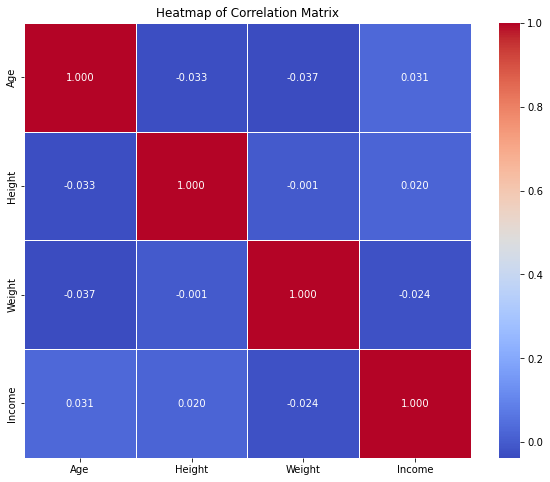

In [8]:
# Calculate the correlation matrix
corr = df.corr()
# The default setting of .corr() method is Pearson correlation coefficient.

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Task 5: Inferential Statistics

### 8. Hypothesis Testing:
* Perform a t-test to see if there is a significant difference in Income between Male and Female.

### T-test
Defining null and alternative hypothesis statements:

Ho - Null: There is no significant difference in Income between Male and Female
<br>
H1 - Alternate: There is a significant difference in Income between Male and Female

If p value less than 0.05 Ho hypothesis should be rejected
<br>
If p value more than 0.05 Ho hypothesis should be excepted

In [11]:
#Install the library to perform activities relative to hypothesos testing
!pip install scipy

In [14]:
# Importing t-test library from scipy
from scipy.stats import ttest_ind

In [15]:
# Defining 2 variables on the bases income of male and income of female
income_male = df[df['Gender'] == 'Male']['Income']
income_female = df[df['Gender'] == 'Female']['Income']

# Performing Independent Sample T-Test based on 2 independent groups that have been created
t_stat = ttest_ind(income_male, income_female)
print(t_stat)

Ttest_indResult(statistic=-0.7407862453038162, pvalue=0.4589973088100079)


Based on the test, the t-statistic is approximately -0.741 and the p-value is about 0.459. Since the p-value is greater than the typical alpha level of 0.05, we fail to reject the null hypothesis, indicating that there is no significant difference in income between male and female in this dataset.

## Technical Questions

### Question 1:
How did you generate the synthetic dataset, and why did you choose normal distributions for the variables?

**Answer:**

The values in the synthetic data were generated randomly using the **random** module from the numpy library:
- **np.random.seed(0)** function was used for reproducibility (with the seed reset (every time), the same set of numbers will appear every time).
- **np.random.normal** function was used to generate normally distributed numerical values for Age, Height, Weight, and Income. 
- **np.random.choice** function is used for generating categorical values with equal probability for Gender. 

Normal distribution was chosen because below advantages:
- Simplicity - the normal distribution can be described by just two parameters (mean and standard deviation).
- Symmetry - the normal distribution is symmetric around its mean, which simplifies the analysis and interpretation of data
- Consistency in Statistical Testing - Many statistical tests and procedures assume that data are normally distributed

### Question 2:
What insights can you draw from the descriptive statistics calculated for Age, Height, Weight, and Income?

**Answer:**

Based on the descriptive statistics calculated for Age, Height, Weight, and Income, can be drawn following insights:

**Age:**
The average age in the dataset is around 34 years.
The ages range widely from 4 to 62 years, including both children and adults.
The standard deviation of about 9.87 years, which is 29% of the mean, can be condsidered as moderate: while there is diversity in age, it's not extremely varied.

**Height:**
The average height is approximately 169.7 cm, which is typical for a mixed gender population.
Heights range from 125 cm to 217 cm, indicating the presence of both very short and very tall individuals.
The standard deviation of 14.53 cm, which is 8.6% of the mean, shows a wide variation as height differences can be visually and functionally significant.

**Weight:**
The mean weight is about 69 kg, aligns well with the average height, suggesting a normal weight distribution.
Weights range from 38 kg to 99 kg, capturing a spectrum from underweight to overweight categories.
The standard deviation of 9.55 kg, which is 13.8% of the mean, reflects a reasonable diversity in body weights, suggesting that while there are differences in body weight, these are not excessively varied.

**Income:**
The average income of the dataset is approximately \\$50,110, with a substantial range from \\$4,888 to \\$93,878.
This broad range in income indicates economic diversity among the individuals.
The standard deviation of about \\$15,029, which is about 30% of the mean, indicates a significant variance in income levels, pointing to different economic statuses.

### Question 3:
What do the KDE plots and histograms tell you about the distribution of the data?

**Answer:**

**Age:**
The histogram and KDE plot for Age show a unimodal distribution that is approximately bell-shaped or normal. The peak of the distribution is around the age of 30-40 years, indicating that a large portion of the data is concentrated around these ages.

**Height:**
The histogram and KDE plot for Height also exhibit a unimodal distribution with a bell-shaped curve. The peak of the distribution is around 165-175 cm, suggesting that the majority of the data falls within this range of heights.

**Weight:**
The distribution of Weight appears to be unimodal and approximately bell-shaped or normal. The histogram bars and the smooth KDE curve both peak around 65-75 kg, suggesting that the majority of the data is concentrated around this central region.

**Income:**
The distribution of Income looks symmetric around the central peak, suggesting a bell-shaped  normal distribution. From this plot, it appears that most income values cluster around the middle range (around \\$40,000 to \\$60,000)

### Question 4:
How can you interpret the boxplots, and what do they reveal about potential outliers in the dataset?

**Answer:**


**Age:**
The boxplot for Age shows a relatively symmetric distribution. 
The median age is around 35 years, represented by the central line within the box. 
The interquartile range (IQR), represented by the box itself, appears relatively narrow, indicating a moderate spread in age values.
The data points younger than 10 or older than 60 years would be considered outliers.

**Height:**
The boxplot for Height also shows a relatively symmetric distribution. 
The median height is around 170 cm, represented by the central line within the box. 
The interquartile range (IQR) shows heights from approximately 160 to around 180 cm.
Several outliers below 140 cm and above 200 cm, indicating unusually short or tall heights compared to the rest of the dataset.

**Weight:**
The Weight boxplot shows a symmetric distribution. 
The median weight is around 70 kg. 
The IQR spanning from approximately 60 kg to 75 kg. 
A few outliers below 40 kg and above 90 kg, suggesting weights that are unusually low or high.

**Income:**
The Income boxplot shows a symmetric distribution. 
The median income is around \\$50,000. 
The IQR spanning from approximately \\$40,000 to \\$60,000. 
There are outliers above \\$80,000, indicating some individuals earn significantly more than the typical range.


### Question 5:
Discuss the significance of the correlation matrix and what relationships you can infer from it.

**Answer:**

1. **Age and Height:** The correlation coefficient between Age and Height is -0.033, indicating a weak negative correlation. This suggests that as age increases, height tends to decrease slightly, but the relationship is minimal.
2. **Age and Weight:** The correlation coefficient between Age and Weight is -0.037, indicating a weak negative correlation. This implies that as age increases, weight tends to decrease slightly, but the relationship is minimal.
3. **Age and Income:** The correlation coefficient between Age and Income is 0.031, suggesting a very weak positive correlation. This could indicate that income tends to increase slightly with age, but the relationship is minimal.
4. **Height and Weight:** The correlation coefficient between Height and Weight is -0.001, which is essentially zero, indicating no linear correlation between these two variables.
5. **Height and Income:** The correlation coefficient between Height and Income is 0.020, suggesting a very weak positive correlation, which is minimal.
6. **Weight and Income:** The correlation coefficient between Weight and Income is -0.024, indicating a very weak negative correlation, which is also minimal.

The strongest correlation observed in the matrix is between Age and Weight, but even this relationship is relatively weak (-0.037). Overall, the correlation matrix reveals that there are no strong linear relationships between the variables in this dataset, implying that these variables are largely independent of each other.




### Question 6:
Explain the results of the t-test. What does the p-value indicate about the difference in Income between Male and Female?

**Answer:**


Based on the test, the t-statistic is approximately -0.741 and the p-value is about 0.459. Since the p-value is greater than the typical alpha level of 0.05, it's failed to reject the null hypothesis, indicating that there is no significant difference in income between male and female in this dataset.